In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [7]:
def median_filter(img: np.array) -> np.array:
  row, col = img.shape
  output_img = np.zeros(shape = [row,col])
  for i in range(1, row-1):
    for j in range(1,col-1):
       temp = [img[i-1, j-1],
               img[i-1, j],
               img[i-1, j + 1],
               img[i, j-1],
               img[i, j],
               img[i, j + 1],
               img[i + 1, j-1],
               img[i + 1, j],
               img[i + 1, j + 1]]
       new = sorted(temp)
       output_img[i,j]= temp[4] 
  return output_img

In [8]:
def slice(mat):
  oroc = mat[::2,::2]
  orec = mat[::2,1::2]
  eroc = mat[1::2,::2]
  erec = mat[1::2,1::2]

  return oroc, orec, eroc, erec

In [10]:
def YCbCr(im):
  #Slicing the first 10 rows and last 13 rows and 1st coloumn
  img = im[10:370,1:962]

  #Making of Y component
  field1 = img[:,0:960]
  field2 = img[:,1:961]
  Y =(field1+field2)/2

  #Making of Cb and Cr
  #Slicing the image in ever, odd rows and columns
  oroc, orec, eroc, erec = slice(img)

  #Apllying median filter to different
  med_oroc = median_filter(oroc)
  med_orec = median_filter(orec)
  med_eroc = median_filter(eroc)
  med_erec = median_filter(erec)

  #Merging the median filtered cells to one image
  med_filt_img = np.zeros(shape=(360,961))
  med_filt_img[::2,::2] = med_oroc
  med_filt_img[::2,1::2] = med_orec
  med_filt_img[1::2,::2] = med_eroc
  med_filt_img[1::2,1::2] = med_erec

  #Shaping it into 360,960 from 360,961
  field01 = med_filt_img[:,0:960]
  field02 = med_filt_img[:,1:961]
  CbCr =((field01-field02)).astype(np.uint16)

  #Multiplying sing matrix
  sing_mat = np.ones((360,960))
  odd_row, even_row, odd_col, even_col  = slice(sing_mat)
  # even_row = sing_mat[1::2,1::2]
  # odd_col = sing_mat[::2,1::2]
  # even_col = sing_mat[1::2,::2] 

  odd_col *=(-1)
  even_col *=(-1)

  zero_mat = np.zeros((360,960))
  zero_mat[::2,::2] += odd_row
  zero_mat[1::2,1::2] += even_row
  zero_mat[::2,1::2] += odd_col
  zero_mat[1::2,::2] += even_col

  sign_multiplied = (zero_mat * CbCr)
  # print(sign_multiplied.max(), sign_multiplied.min())

  #Splitting it in Cb and Cr
  cb = sign_multiplied[::2,::]
  cr = sign_multiplied[1::2,::]
  print(cr.shape)

  return Y,cb,cr

In [11]:
raw  = open('/content/drive/MyDrive/Colab Notebooks/1_raw.txt','r')
rows = 383
cols = 962
f = np.fromfile(raw, dtype=np.uint16, count = rows*cols)
image = f.reshape((rows, cols))

#normalizing values from 0-255
mn = image.min()
mx = image.max()
mx -= mn
image = ((image - mn)/(mx)) * 255
y,cb,cr = YCbCr(image)


(180, 960)


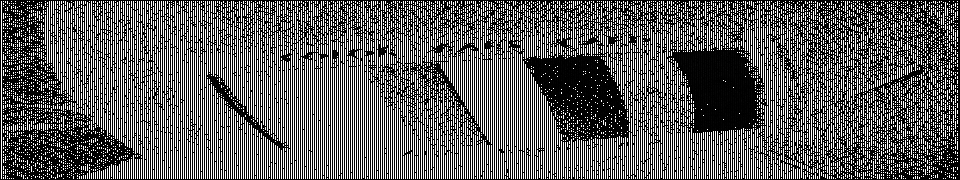

In [14]:
cv2_imshow(r)

float64 0.0 255.0


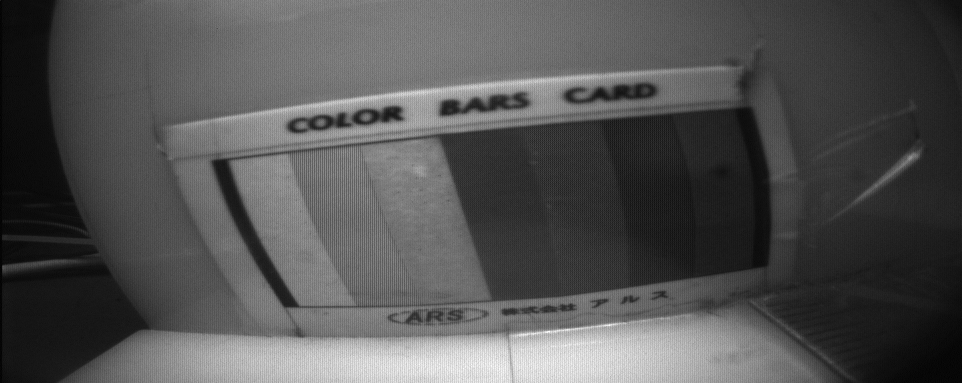

In [22]:
print(image.dtype, image.min(), image.max())
cv2_imshow(image)

In [23]:
#Srtictly run the cell only once, else restart the code
img = image[10:370,1:962]
print(img.shape)

(360, 961)


In [24]:
field1 = img[:,0:960]
field2 = img[:,1:961]
Y =(field1+field2)/2
erec = img[::2,::2]
eroc = img[::2,1::2]
orec = img[1::2,::2]
oroc = img[1::2,1::2]
Y.shape

(360, 960)

In [25]:
#Apllying median filter to different 
med_erec = median_filter(erec)
med_eroc = median_filter(eroc)
med_orec = median_filter(orec)
med_oroc = median_filter(oroc)

In [26]:
#Merging the median filtered cells to one image
med_filt_img = np.zeros(shape=(360,961))
med_filt_img[::2,::2] = med_erec
med_filt_img[::2,1::2] = med_eroc 
med_filt_img[1::2,::2] = med_orec
med_filt_img[1::2,1::2] = med_oroc

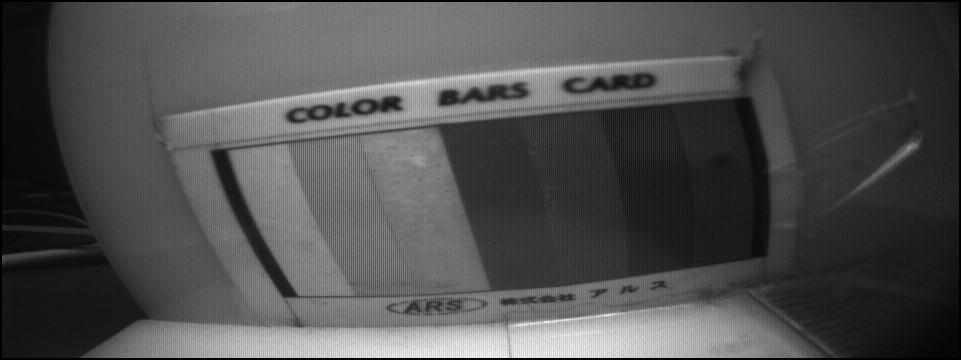

(360, 961)
253.84908321579692


In [27]:
#UC
cv2_imshow(med_filt_img)
print(med_filt_img.shape)
print(med_filt_img.max())

In [28]:
field01 = med_filt_img[:,0:960]
field02 = med_filt_img[:,1:961]
CbCr =((field01-field02)).astype(np.uint16)

#Multiplying sing matrix
sing_mat = np.ones((360,960))

odd_row = sing_mat[::2,::2]
even_row = sing_mat[1::2,1::2]

odd_col = sing_mat[::2,1::2]
even_col = sing_mat[1::2,::2] 
odd_col *=(-1)
even_col *=(-1)

zero_mat = np.zeros((360,960))
zero_mat[::2,::2] += odd_row
zero_mat[1::2,1::2] += even_row
zero_mat[::2,1::2] += odd_col
zero_mat[1::2,::2] += even_col

sign_multiplied = (zero_mat * CbCr)
print(sign_multiplied.max(), sign_multiplied.min())

#Splitting it in Cb and Cr
cb = sign_multiplied[::2,::]
cr = sign_multiplied[1::2,::]
print(cr.shape)

65535.0 -65535.0
(180, 960)


In [29]:

# print(Cb.min(),Cr.max())
# # print(Cr.min(),Cr.max())

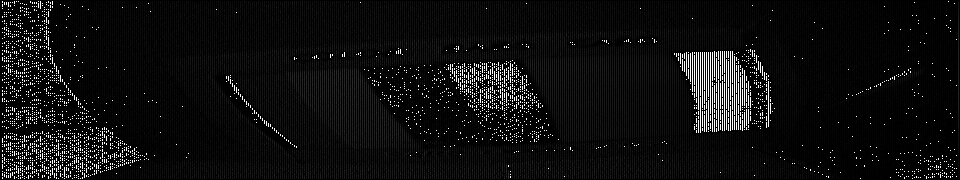

In [30]:
cv2_imshow(cb)

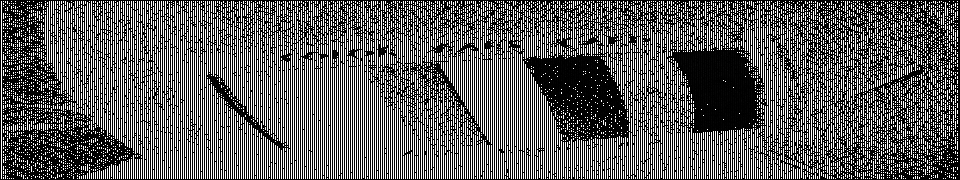

In [31]:
cv2_imshow(cr)

In [36]:
print(Cr.dtype)

uint8


In [4]:
def slice(number):
  erec = number[::2,::2]
  eroc = number[::2,1::2]
  orec = number[1::2,::2]
  oroc = number[1::2,1::2]

  return erec, eroc, orec, oroc

In [5]:
num = np.array([[0,1,2,3],
              [4,5,6,7],
              [8,9,10,11],
              [12,13,14,15]])
erec, eroc, orec, oroc = slice(num)


In [6]:
print(erec, eroc)

[[ 0  2]
 [ 8 10]] [[ 1  3]
 [ 9 11]]


In [8]:
odd_row = num[::2,::2]
even_row = num[1::2,1::2]
print(odd_row)
print(even_row)

[[ 0  2]
 [ 8 10]]
[[ 5  7]
 [13 15]]


In [12]:
odd_col = num[::2,1::2]
even_col = num[1::2,::2] 
odd_col *=(-1)
even_col *=(-1)
print(odd_col)
print(even_col)

[[ -1  -3]
 [ -9 -11]]
[[ -4  -6]
 [-12 -14]]


In [17]:
sing_mat = np.ones((360,960))

odd_row = sing_mat[::2,::2]
even_row = sing_mat[1::2,1::2]

odd_col = sing_mat[::2,1::2]
even_col = sing_mat[1::2,::2] 
odd_col *=(-1)
even_col *=(-1)

zero_mat = np.zeros((360,960))
zero_mat[::2,::2] += odd_row
zero_mat[1::2,1::2] += even_row
zero_mat[::2,1::2] += odd_col
zero_mat[1::2,::2] += even_col

In [18]:
print(zero_mat)

[[ 1. -1.  1. ... -1.  1. -1.]
 [-1.  1. -1. ...  1. -1.  1.]
 [ 1. -1.  1. ... -1.  1. -1.]
 ...
 [-1.  1. -1. ...  1. -1.  1.]
 [ 1. -1.  1. ... -1.  1. -1.]
 [-1.  1. -1. ...  1. -1.  1.]]


In [4]:
nu= num[::,1::2]*(-1)
print(nu)

[[ -1  -3]
 [ -5  -7]
 [ -9 -11]
 [-13 -15]]


In [8]:
rav = num.ravel()
for i in range(len(rav)):
  if (i%2==0):
    rav[i] *= (-1)
ra=rav.reshape(4,4)

In [9]:
print(ra)

[[  0   1  -2   3]
 [ -4   5  -6   7]
 [ -8   9 -10  11]
 [-12  13 -14  15]]
